In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sc
from scipy import interpolate
import pylab as pl
import sys

G=1.  
M=1.  
tend=4*np.pi  
h=0.001
#y[0]=x,y[1]=v_x,y[2]=y,y[3]=v_y
y=([0.5,0,0,0.5],[-0.5,0,0,-0.5]) #vy1 = -vy2
t=0

In [2]:
def f(t, y):
    f=np.zeros((2,4))
    
    r1= np.sqrt(y[0][0]*y[0][0]+y[0][2]*y[0][2])
    r2 = np.sqrt(y[1][0]*y[1][0]+y[1][2]*y[1][2])
    
    f[0][0]=y[0][1]
    f[0][1]=-G*M/r1/r1/r1*y[0][0]
    f[0][2]=y[0][3]
    f[0][3]=-G*M/r1/r1/r1*y[0][2]
    
    f[1][0]=y[1][1]
    f[1][1]=-G*M/r2/r2/r2*y[1][0]
    f[1][2]=y[1][3]
    f[1][3]=-G*M/r2/r2/r2*y[1][2]
    return f



def rk4(t, h, y):
    k1 = np.zeros((2,4))
    k2 = np.zeros((2,4))
    k3 = np.zeros((2,4))
    k4 = np.zeros((2,4))
    k1=h*f(t,y)
    k2=h*f(t+0.5*h,y+0.5*k1)
    k3=h*f(t+0.5*h,y+0.5*k2)
    k4=h*f(t+h,y+k3)
    y+=(k1+2.*(k2+k3)+k4)/6.
    return y

xp1=[]
yp1=[]
xp2=[]
yp2=[]
while(t<tend):
    if((t+h)>tend):
        h=tend-t
    y = rk4(t,h,y)
    xp1=np.append(xp1,y[0][0])
    yp1=np.append(yp1,y[0][2])
    xp2=np.append(xp2,y[1][0])
    yp2=np.append(yp2,y[1][2])
    
    t = t+h

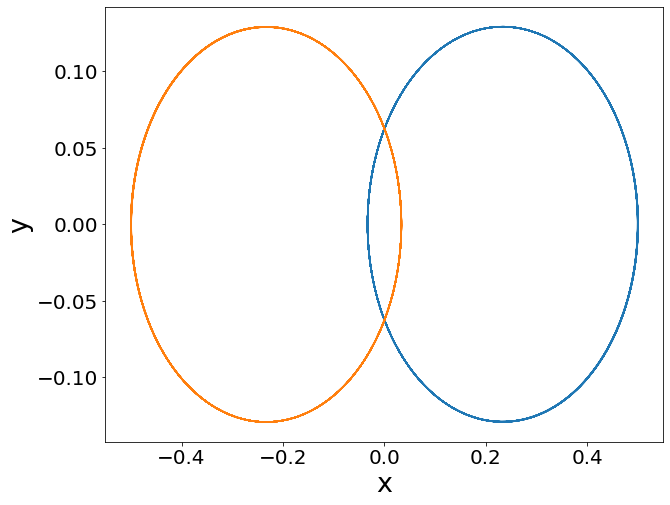

In [3]:
plt.figure(figsize=(10,8))
ax=pl.gca()
plt.xlabel("x",fontsize=27)
plt.ylabel("y",fontsize=27)
plt.tick_params(labelsize=20)

plt.plot(xp1,yp1)
plt.plot(xp2,yp2)
plt.show()